In [31]:
import numpy as np
import matplotlib.pyplot as plt
from stlpy.systems import LinearSystem, DoubleIntegrator
from stlpy.STL import LinearPredicate
from stlpy.solvers import GurobiMICPSolver

In [46]:
T = 5

A = np.array([[1.]])
B = np.array([[1.]])
C = np.array([[1.]])
D = np.array([[0.]])
#sys = DoubleIntegrator(1)
sys = LinearSystem(A,B,C,D)

x0 = np.array([[0]])

In [47]:
pi = LinearPredicate(a=[1], b=[2])  # a*y - b > 0
spec = pi.eventually(0, T)          # F_[0,5] pi

In [48]:
solver = GurobiMICPSolver(spec, sys, x0, T)
solver.AddQuadraticCost(Q=np.eye(1), R=np.eye(1))
x, u, _, _ = solver.Solve()

Setting up optimization problem...
Setup complete in 0.03571200370788574 seconds.
<class 'gurobipy.MQuadExpr'>
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 27 rows, 32 columns and 67 nonzeros
Model fingerprint: 0x90f1602d
Model has 12 quadratic objective terms
Variable types: 26 continuous, 6 integer (6 binary)


Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+00, 1e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 16 rows and 16 columns
Presolve time: 0.00s
Presolved: 11 rows, 16 columns, 34 nonzeros
Presolved model has 10 quadratic objective terms
Variable types: 11 continuous, 5 integer (5 binary)
Found heuristic solution: objective 6.4727273

Root relaxation: objective -7.980438e+02, 20 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 -798.04382    0    5    6.47273 -798.04382      -     -    0s

Explored 1 nodes (20 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 16 (of 16 available processors)

Solution count 1: 6.47273 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.472727272726e+00, best 

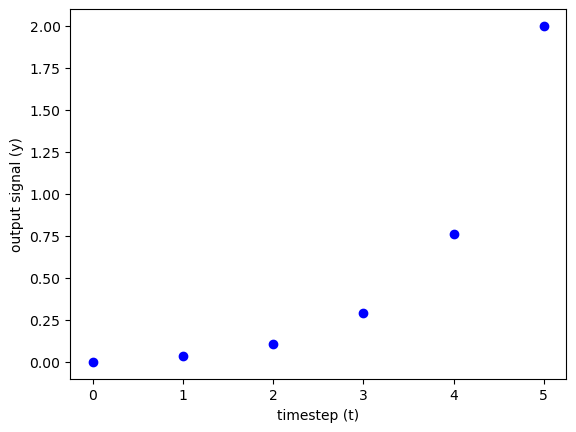

In [49]:
plt.plot([i for i in range(T+1)], x.flatten(), 'bo')
plt.xlabel("timestep (t)")
plt.ylabel("output signal (y)")
plt.show()